In [4]:
import numpy as np
import matplotlib.pyplot as plt

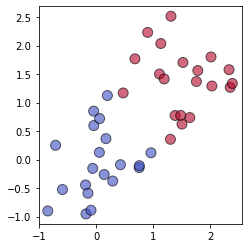

In [10]:
np.random.seed(7)
X = np.random.normal(0, 0.5, [40, 2])
X[:20] += 1.5
# X[:2], X[20:22]
z = np.zeros(40)
# z
z[:20] += 1
# z

plt.axes(aspect=1)
plt.scatter(X[:,0], X[:,1], 100, c=z, edgecolor='k', alpha=.6, cmap='coolwarm')
plt.show()

# Write fucntion in Matrix-Form

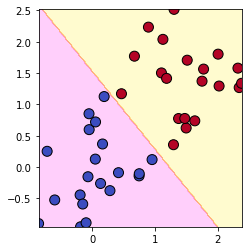

In [15]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def cross_entropy(z, h):
    return -(z*np.log(h) + (1-z) * np.log(1-h)).mean()
    
w = np.array([0,0.0])
b = 0
eta = .1

entropy = []
score = []

n_learns = 1000

# WRITE IN MATRIX MULTIPLICATION
for o in range(n_learns):
    a = np.dot(X, w) + b
    h = sigmoid(a)
    g_a = (h-z)/len(z)
    g_w = np.dot(X.T, g_a)
    g_b = g_a.sum()

    # weigth adjustion
    w -= eta * g_w
    b -= eta * g_b

    entropy.append(cross_entropy(z, h))
    score.append(((a>=0) == z ).mean())

# viz
lins = np.linspace(-0.5, 1.5, 200)
mx, my = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 200),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 200)
                    )
mX = np.array([mx.ravel(), my.ravel()]).T
mh = np.dot(mX, w) + b
# NO SIGMOID
mz = (mh >= 0 ).astype(int).reshape(200, -1)

plt.axes(aspect=1, xlim=[X[:, 0].min(), X[:, 0].max()],
        ylim=[X[:, 1].min(), X[:, 1].max()]
        )
plt.contourf(mx,my,mz, cmap='spring', alpha=.2)
plt.scatter(X[:,0], X[:,1], s=100, c=z, edgecolor='k', cmap='coolwarm' )
plt.show()

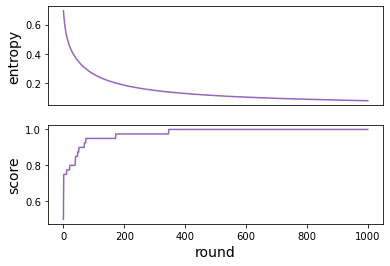

In [20]:
plt.subplot(211,xticks=[])
plt.plot(entropy,'C4')
plt.ylabel(u'entropy', size=14)

plt.subplot(212)
plt.plot(score,'C4')
plt.ylabel(u'score', size=14)

plt.xlabel(u'round', size=14)
plt.show()

# Write in Class format

In [8]:
class LogisticRegression:
    def __init__(self, eta):
        self.eta = eta
        
    def cal_A(self, X):
        return np.dot(X, self.w) + self.b
    
    def learn(self, X, z, n_learns):
        self.w = np.zeros(x.shape[1])
        self.b = 0
        self.entropy = []
        self.score = []
        
        for i in range(n_learns):
            a = self.cal_A(X)
            h = sigmoid(a)
            J = cross_entropy(z, h)
            g_a = (h-z)/len(z)
            
            self.w -= self.eta * np.dot(g_a, X)
            self.b -= self.eta * g_a.sum()
            
            self.entropy.append(J)
            score = ((a>=0) == z ).mean()
            self.score.append(score)
    def predict(self, X):
        return (self.cal_A(X) >= 0).astype(int)
    

In [2]:
from glob import glob
d = 25
X1 = np.array([plt.imread(x) for x in glob('../../SAMPLE DATA/ruprang-raisi-25x25x1000x5/0/*.png')]).reshape(-1, 625)
X2 = np.array([plt.imread(x) for x in glob('../../SAMPLE DATA/ruprang-raisi-25x25x1000x5/1/*.png')]).reshape(-1, 625)
X = np.vstack([X1[:900], X2[:900]])
z = np.arange(2).repeat(900)

NameError: name 'np' is not defined

In [15]:
model = LogisticRegression(eta=.01)
model.learn(X, z, n_learns=1000)

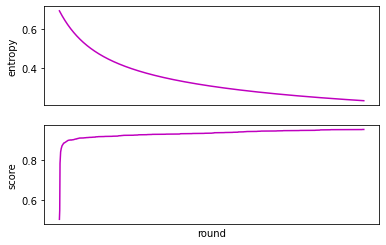

In [19]:
plt.subplot(211, xticks=[])
plt.plot(model.entropy, 'm')
plt.ylabel('entropy')

plt.subplot(212, xticks=[])
plt.plot(model.score, 'm')
plt.ylabel('score')

plt.xlabel('round')
plt.show()

# Model Evaluation

In [21]:
Xo = np.vstack([X1[900:], X2[900:]])
zo = np.arange(2).repeat(100)

print((model.predict(Xo) == zo).mean())

0.95
